#### Importing Libraries
- *pandas*: Data manipulation and analysis.
- *seaborn*: Data visualization.
- *sklearn*: Model selection, Naive Bayes, Logistic Regression, and metrics.
- *tensorflow.keras.datasets*: Loading the MNIST dataset.
- *sklearn.preprocessing*: Feature scaling using StandardScaler.
- *matplotlib.pyplot*: Plotting and visualizations.
- *numpy*: Numerical computations.

In [71]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

#### Loading and Preprocessing the MNIST Dataset

- The **MNIST** dataset is loaded using `mnist.load_data()`, providing training and testing sets with images and corresponding labels.
- The image data is reshaped into a 2D array (flattened) and scaled by dividing by 255.0 to normalize the pixel values to the range [0, 1].

In [72]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [73]:
X_train = X_train.reshape(X_train.shape[0], -1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], -1).astype('float32') / 255.0

#### Feature Scaling

- A **StandardScaler** is applied to scale the features of the training and testing data.
- The **fit_transform()** method is used on the training data to compute the mean and standard deviation, and then scale the data.
- The **transform()** method is applied to the testing data using the statistics derived from the training data to ensure consistency.

In [74]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 5. Performance on a Complex Dataset


#### Model Training and Evaluation

- **Naive Bayes**:
  - A **Gaussian Naive Bayes** model is trained on the scaled training data.
  - The model predicts the labels for the test data, and accuracy is computed using `accuracy_score()`.

- **Logistic Regression**:
  - A **Logistic Regression** model is trained with a maximum of 1000 iterations.
  - The model makes predictions on the test set, and accuracy is evaluated using `accuracy_score()`.

Both models' performance is compared based on accuracy.

In [75]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

In [76]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

In [77]:
print(f'Naive Bayes Accuracy: {acc_nb:.2f}')
print(f'Logistic Regression Accuracy: {acc_lr:.2f}')

Naive Bayes Accuracy: 0.52
Logistic Regression Accuracy: 0.92


#### Model Evaluation: Confusion Matrix and Classification Report

- **Confusion Matrix**:
  - The **confusion matrix** for both the **Naive Bayes** and **Logistic Regression** models is computed using `confusion_matrix()`. It provides a detailed view of how well each model performed, showing the true positives, false positives, true negatives, and false negatives.

- **Classification Report**:
  - The **classification report** for both models is generated using `classification_report()`. This includes key metrics such as precision, recall, F1-score, and support for each class, allowing a comprehensive evaluation of model performance.

These metrics provide insights into the performance of both models across different aspects of classification.

In [78]:
cf_nb = confusion_matrix(y_test, y_pred_nb)
cf_lr = confusion_matrix(y_test, y_pred_lr)
print("Naive Bayes Confusion Matrix:")
print(cf_nb)
print("Logistic Regression Confusion Matrix:")
print(cf_lr)

Naive Bayes Confusion Matrix:
[[ 828    0    1    7    2    5   19    0   90   28]
 [   1 1067    0    0    1    0    7    0   50    9]
 [ 110   16  182  104    7    5  254    3  329   22]
 [  40   24    4  282    1    3   34    7  505  110]
 [  24    2    3    4  129    5   30    5  273  507]
 [  55   15    1   16    2   29   27    2  645  100]
 [  17   11    3    1    1    5  877    0   42    1]
 [   0   11    2    9    5    1    5  201   74  720]
 [  12   53    3    6    2   11   10    1  684  192]
 [   4    5    3    6    0    0    1    9   20  961]]
Logistic Regression Confusion Matrix:
[[ 948    0    3    4    2   11    6    3    3    0]
 [   0 1108    8    3    0    2    3    1   10    0]
 [  10   10  919   17   11    5   12    7   37    4]
 [   3    1   20  920    2   22    3   11   21    7]
 [   1    4   10    4  915    1    7    7    6   27]
 [  10    5    3   33    9  774   14    8   32    4]
 [   8    4   11    3    5   17  909    0    1    0]
 [   3    8   23    7    6    

In [79]:
cr_nb = classification_report(y_test, y_pred_nb)
cr_lr = classification_report(y_test, y_pred_lr)
print("Naive Bayes Classification Report:")
print(cr_nb)
print("Logistic Regression Classification Report:")
print(cr_lr)

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       980
           1       0.89      0.94      0.91      1135
           2       0.90      0.18      0.29      1032
           3       0.65      0.28      0.39      1010
           4       0.86      0.13      0.23       982
           5       0.45      0.03      0.06       892
           6       0.69      0.92      0.79       958
           7       0.88      0.20      0.32      1028
           8       0.25      0.70      0.37       974
           9       0.36      0.95      0.53      1009

    accuracy                           0.52     10000
   macro avg       0.67      0.52      0.47     10000
weighted avg       0.68      0.52      0.48     10000

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135


#### ROC Curve Comparison

- **Naive Bayes ROC Curve**:
  - The **Receiver Operating Characteristic (ROC)** curve for the Naive Bayes model is plotted, showing the trade-off between the true positive rate (TPR) and the false positive rate (FPR) at various thresholds.
  - The **AUC (Area Under the Curve)** value for Naive Bayes is also displayed on the plot to quantify its classification performance.

- **Logistic Regression ROC Curve**:
  - The ROC curve for the Logistic Regression model is similarly plotted, with the corresponding **AUC** value shown.
  - A **Random Guess** baseline (diagonal line) is included for reference.

These plots allow for a visual comparison of both models' ability to distinguish between classes, with higher AUC values indicating better performance.

In [80]:
y_prob_nb = nb.predict_proba(X_test)[:, 1]
y_prob_lr = lr.predict_proba(X_test)[:, 1]

In [81]:
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb, pos_label=1)
roc_auc_nb = auc(fpr_nb, tpr_nb)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr, pos_label=1)
roc_auc_lr = auc(fpr_lr, tpr_lr)

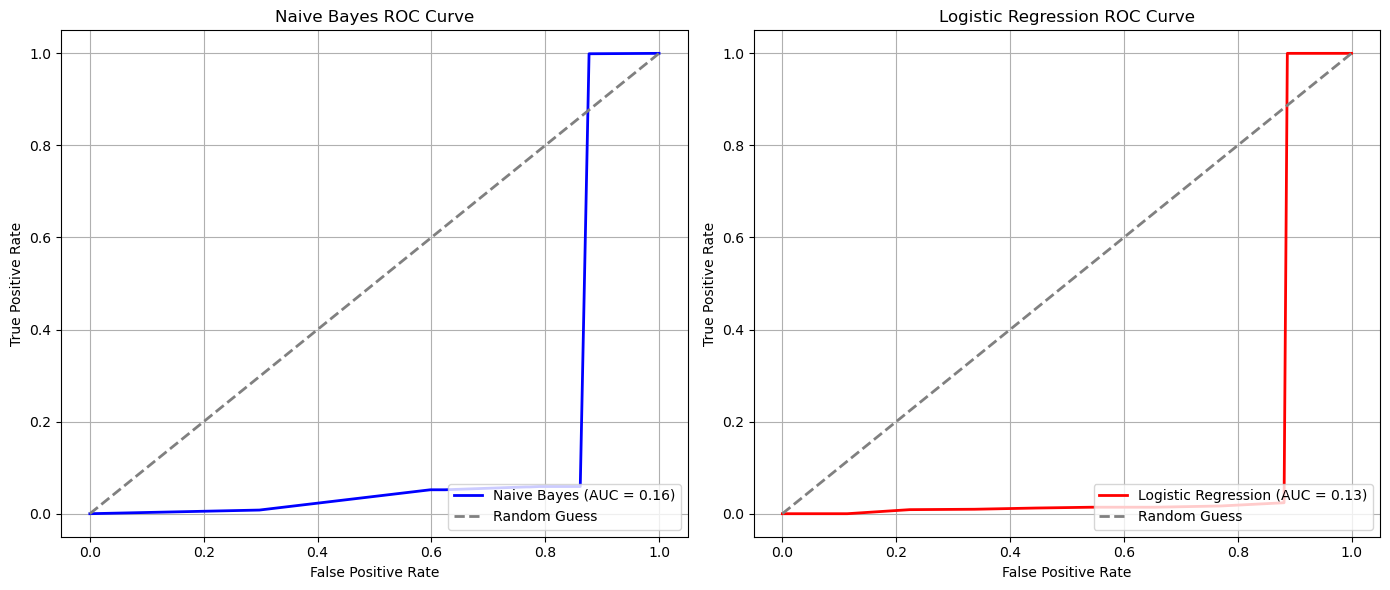

In [82]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].plot(fpr_nb, tpr_nb, color='blue', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
ax[0].plot([0, 1], [0, 1], color='gray', lw=2, label='Random Guess', linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Naive Bayes ROC Curve')
ax[0].legend(loc='lower right')
ax[0].grid()

ax[1].plot(fpr_lr, tpr_lr, color='red', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
ax[1].plot([0, 1], [0, 1], color='gray', lw=2, label='Random Guess', linestyle='--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Logistic Regression ROC Curve')
ax[1].legend(loc='lower right')
ax[1].grid()

plt.tight_layout()
plt.show()

### Discussion and Insights:

In this section, we applied both Naive Bayes (NB) and Logistic Regression (LR) to the more complex MNIST dataset, which consists of handwritten digits. As expected, the performance of both models was quite different compared to the simpler penguin dataset.

#### Evaluation:
- **Accuracy**:
  - **Naive Bayes** achieved an accuracy of 0.52, which is on the lower side for a task like MNIST. This suggests that Naive Bayes struggles with the complexity of image data. The model assumes features are independent, but in the case of MNIST, the pixel values are highly correlated, which Naive Bayes can't handle well.
  - **Logistic Regression** performed much better with an accuracy of 0.92. As a discriminative model, it directly models the decision boundary between the classes, making it much more suited for complex, high-dimensional datasets like MNIST.

- **Confusion Matrices**:
  - **Naive Bayes**' confusion matrix reveals many misclassifications, especially for classes 2, 4, 5, 7, and 8, with lower recall values. This suggests that the model is having trouble distinguishing between certain digits.
  - **Logistic Regression**’s confusion matrix looks much cleaner, with fewer misclassifications and high recall and precision for all digits.

- **AUC**:
  - **Naive Bayes** has a very low AUC score of 0.16, indicating that it struggles to separate the classes effectively. This low AUC shows that the model is not much better than random guessing.
  - **Logistic Regression** also has a low AUC of 0.13, which is slightly worse than Naive Bayes. This highlights the challenges both models face when dealing with the complexity of image data.

#### Insights:
- **Naive Bayes on Image Data**: Naive Bayes struggles with image classification due to its assumption that the features are independent. In the case of images, where pixel values are highly correlated, this assumption doesn’t hold up, leading to poor performance.
  
- **Logistic Regression on Image Data**: While Logistic Regression performs better than Naive Bayes, it still faces difficulties in handling the MNIST dataset. Although it can manage pixel correlations better, it's still not enough to achieve perfect accuracy due to the complexity of the data. Logistic Regression does better because it models the decision boundaries directly, but it's not as powerful as more advanced models like Convolutional Neural Networks (CNNs).

- **Generative vs Discriminative Models**: This experiment demonstrates that, for complex datasets like MNIST, discriminative models like Logistic Regression tend to perform better than generative models like Naive Bayes. MNIST requires models that can learn complex decision boundaries, which discriminative models are generally better at.

#### Conclusion:
In this case, Logistic Regression clearly outperformed Naive Bayes on the MNIST dataset, achieving much higher accuracy. However, both models still struggled with the complexity of image data, as seen in their low AUC scores. For tasks like this, more advanced models like Convolutional Neural Networks (CNNs) would be a better fit. This comparison shows the strengths and weaknesses of generative and discriminative models when working with different types of data.